In [ ]:
pip install h5py

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

In [3]:

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
)

Found 1506 images belonging to 3 classes.


In [4]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
count=0
for image_batch, label_batch in train_generator:
    print(label_batch)
    print(image_batch[0])
    break


[0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 2. 0. 0. 0. 0. 0. 1. 2. 2. 1. 1. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0.]
[[[0.43529415 0.40815842 0.4356094 ]
  [0.41647965 0.38902867 0.41647965]
  [0.41192445 0.38447344 0.41192445]
  ...
  [0.5715361  0.563693   0.5833008 ]
  [0.57180613 0.563963   0.58357084]
  [0.57207614 0.564233   0.58384085]]

 [[0.43529415 0.40833846 0.43578944]
  [0.41692966 0.38947868 0.41692966]
  [0.41201442 0.38456345 0.41201442]
  ...
  [0.57613194 0.5682888  0.58789665]
  [0.57622194 0.5683788  0.58798665]
  [0.57631195 0.5684688  0.58807665]]

 [[0.43529415 0.40851843 0.4359694 ]
  [0.41737968 0.3899287  0.41737968]
  [0.41210443 0.38465345 0.41210443]
  ...
  [0.565725   0.5578819  0.57748973]
  [0.565455   0.5576119  0.5772197 ]
  [0.56518507 0.55734193 0.5769498 ]]

 ...

 [[0.5170083  0.5052436  0.5326946 ]
  [0.5166483  0.5048836  0.53233457]
  [0.5162883  0.5045236  0.53197455]
  ...
  [0.7019608  0.6901961  0.7176471 ]
  [0.70229954 0.69053483 0.7179858 ]
  [0.7058824  

In [7]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [8]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 431 images belonging to 3 classes.


## Building the Model

In [9]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

C:\Users\Shakeer\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [12]:
1506/32

47.0625

In [13]:
215/32

6.71875

In [14]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20


C:\Users\Shakeer\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 43s 811ms/step - accuracy: 0.4777 - loss: 0.9475 - val_accuracy: 0.5677 - val_loss: 0.9000
Epoch 2/20
 1/47 ━━━━━━━━━━━━━━━━━━━━ 23s 506ms/step - accuracy: 0.5938 - loss: 1.0537

C:\Users\Shakeer\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5938 - loss: 1.0537 - val_accuracy: 0.5652 - val_loss: 0.9349
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 43s 850ms/step - accuracy: 0.5056 - loss: 0.8532 - val_accuracy: 0.6406 - val_loss: 0.7414
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5312 - loss: 0.8054 - val_accuracy: 0.8261 - val_loss: 0.6129
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 38s 749ms/step - accuracy: 0.7217 - loss: 0.6248 - val_accuracy: 0.7552 - val_loss: 0.5833
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7812 - loss: 0.5155 - val_accuracy: 0.7391 - val_loss: 0.6265
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 38s 753ms/step - accuracy: 0.7647 - loss: 0.5720 - val_accuracy: 0.7708 - val_loss: 0.5386
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8125 - loss: 0.3604 - val_accuracy: 0.6522 - val_loss: 0.6772
Epoch 9/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 790ms/step - accuracy: 0.8042 - loss: 0.4306 - val_accuracy: 0.7865 - val_loss

In [15]:
scores = model.evaluate(test_generator)

14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 466ms/step - accuracy: 0.9577 - loss: 0.1597


In [16]:
scores

[0.16441470384597778, 0.9489558935165405]

In [17]:
history

In [18]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [19]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [20]:
type(history.history['loss'])

list

In [21]:
len(history.history['loss'])

20

In [22]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.915375292301178,
 1.0537359714508057,
 0.8224493265151978,
 0.8054404258728027,
 0.5791069865226746]

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [24]:
val_acc

[0.5677083134651184,
 0.5652173757553101,
 0.640625,
 0.8260869383811951,
 0.7552083134651184,
 0.739130437374115,
 0.7708333134651184,
 0.6521739363670349,
 0.7864583134651184,
 0.8260869383811951,
 0.8541666865348816,
 0.8260869383811951,
 0.9114583134651184,
 0.8695651888847351,
 0.8072916865348816,
 0.8695651888847351,
 0.875,
 1.0,
 0.9322916865348816,
 0.9130434989929199]

In [25]:
acc

[0.48371776938438416,
 0.59375,
 0.5427408218383789,
 0.53125,
 0.7516960501670837,
 0.78125,
 0.7734056711196899,
 0.8125,
 0.8215739727020264,
 0.90625,
 0.8649932146072388,
 0.90625,
 0.9077340364456177,
 0.8125,
 0.9206241369247437,
 0.78125,
 0.9138398766517639,
 0.875,
 0.9294437170028687,
 0.96875]

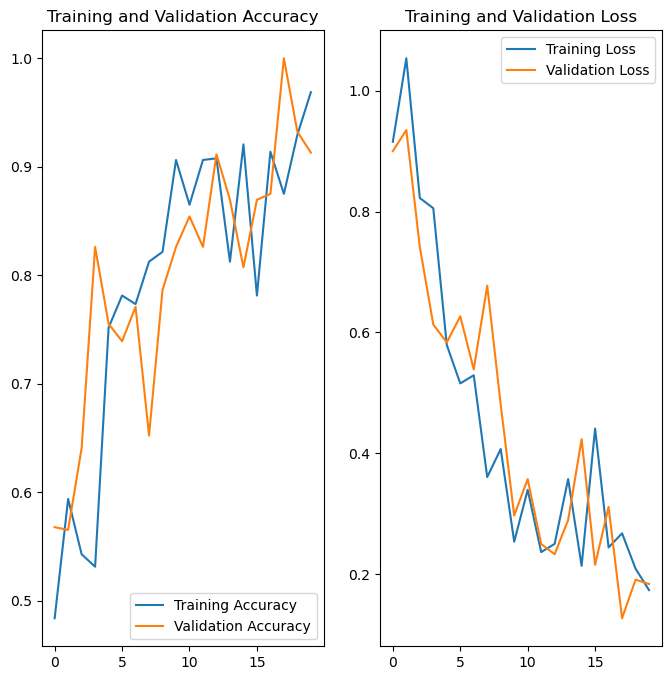

In [26]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

First image to predict:


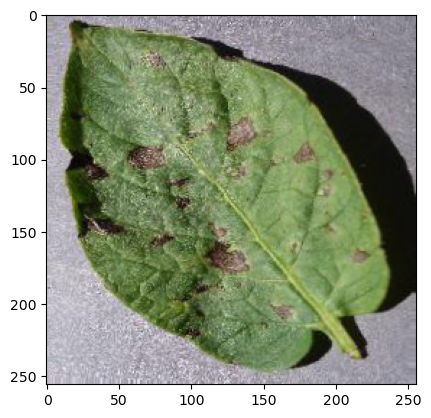

Actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
Predicted label: Potato___Early_blight


In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming test_generator and class_names are already defined
# Also assuming the model is already loaded

for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("First image to predict:")
    plt.imshow(first_image)
    plt.show()
    print("Actual label:", class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("Predicted label:", class_names[np.argmax(batch_prediction[0])])
    
    break


In [28]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


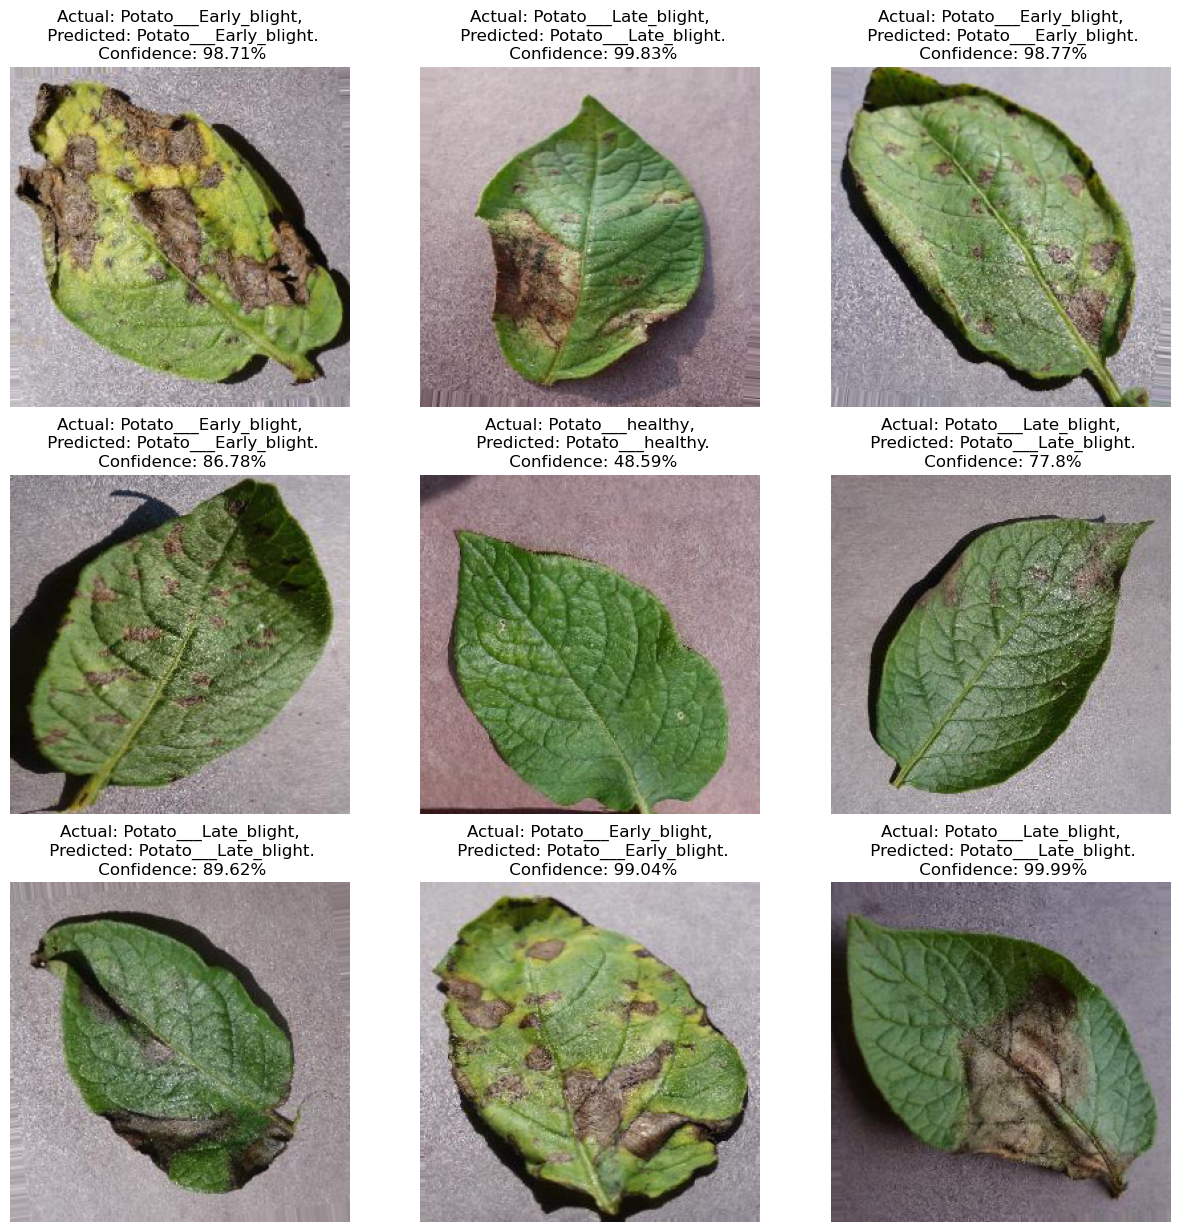

In [29]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

### Saving the Model

Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [30]:
model.save("../potatoes.h5")